<Axes: xlabel='rating,feedback'>

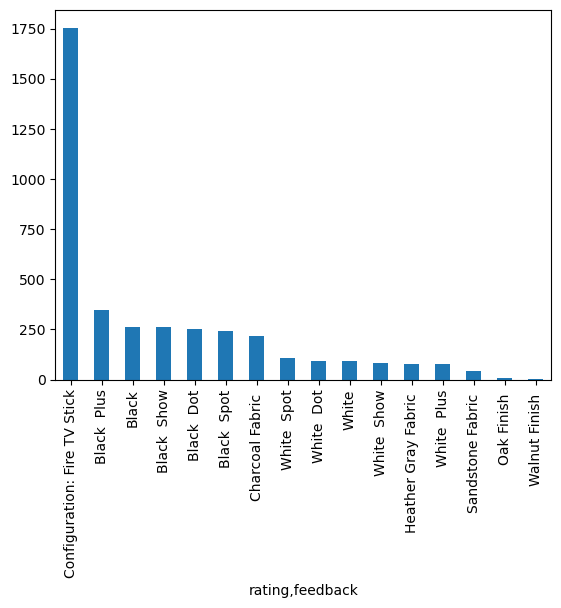

In [1]:
import pandas as pd
data=pd.read_csv('amazon2.tsv',sep='\t')
data.info
data.isnull().sum()
data.describe()
data[data.duplicated()]
data.drop_duplicates(inplace=True)
data['verified_reviews']=data['verified_reviews'].astype(str)
data.shape
data[['rating','feedback','variation']].value_counts()
import matplotlib.pyplot as plt
data[['rating','feedback']].value_counts().plot.bar()
data['variation'].value_counts().plot.bar()

In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
stemmer=PorterStemmer()
stop_words=stopwords.words('english')
def preprs(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=re.sub(f'[{string.punctuation}]','',text)
    tokens=word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['clean_data']=data['verified_reviews'].apply(preprs)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(data['clean_data'])
# Target variable 
y = data['feedback']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
clf= DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.54      0.42      0.47        50
           1       0.94      0.96      0.95       437

    accuracy                           0.90       487
   macro avg       0.74      0.69      0.71       487
weighted avg       0.89      0.90      0.90       487



array([[ 21,  29],
       [ 18, 419]], dtype=int64)

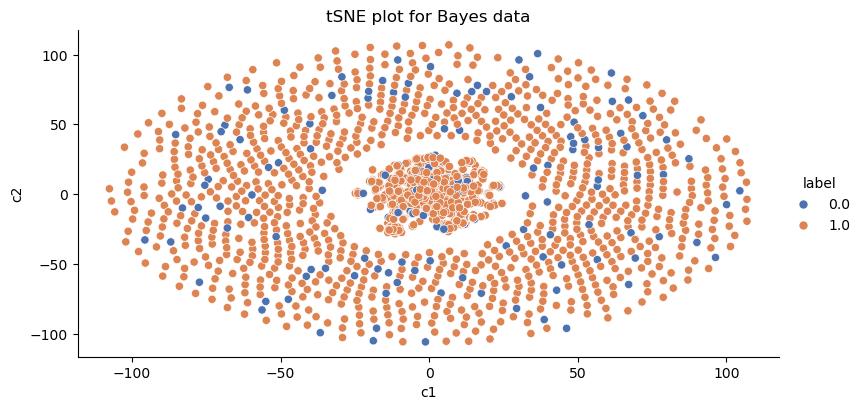

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Building TSNE model for Visualization 
from sklearn.manifold import TSNE
tsne=TSNE(init='random')
arr=tsne.fit_transform(X_tfidf)
dff=pd.DataFrame(arr,columns=['c1','c2'])
dff['label']=data['feedback']
# Ploting scatter plot for checking dispersion of data
sns.relplot(dff,x='c1',y='c2',kind='scatter',hue='label',palette='deep',height=4,aspect=2)
plt.title('tSNE plot for Bayes data')
plt.show()

<Axes: >

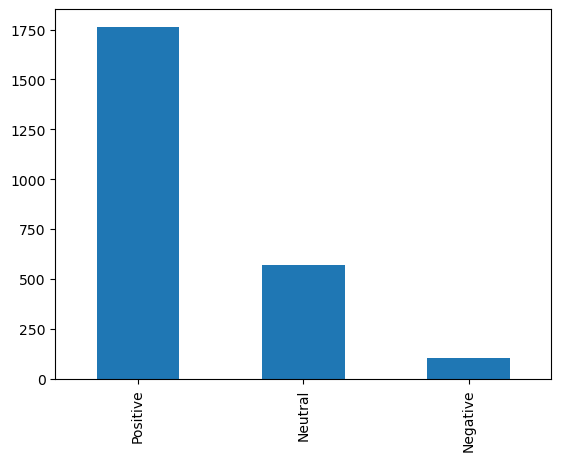

In [6]:
# Sentimental Analysis
def get_sentiment_(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


data['sentiment']=data['clean_data'].apply(get_sentiment_)
data['sentiment'].value_counts().plot.bar()

In [7]:
model_bundle = {
    'model': nb_grid,
    'vectorizer':vectorizer
}

from pickle import dump
with open('nlp.pkl', 'wb') as f:
    dump(model_bundle, f)

NameError: name 'nb_grid' is not defined